# 🎯 **Project Overview**  
Dalam proyek ini, kita akan melakukan **web scraping** untuk mengambil **ulasan pengguna** dari aplikasi **Programming Hub: Learn to code** di Google Play Store. 

## 🔧 **Libraries Used**

In [249]:
from google_play_scraper import reviews, Sort, app

# Data & Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP dan Preprocessing
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import contractions
import re
import unicodedata
import spacy

# Model dan Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# WordCloud
from wordcloud import WordCloud

# Utility
from collections import Counter

## 🏁 **Tahapan Proyek**  

### 1️⃣  **Scraping Data** → Mengambil ulasan aplikasi menggunakan `google_play_scraper`

In [250]:
info = app('com.freeit.java')  # ID aplikasi programming_hub
print("Versi terbaru:", info['version'])

Versi terbaru: 5.2.40


In [251]:
# Ambil 1000 review terbaru
result, _ = reviews(
    'com.freeit.java',
    lang='en',
    count=1000,
    sort=Sort.NEWEST
)

# Simpan ke dalam variabel filtered_reviews agar tetap kompatibel
filtered_reviews = result

In [252]:
# Simpan hasil filter ke dalam DataFrame
df = pd.DataFrame(filtered_reviews)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1e5fb59d-ca8e-4ed1-be03-3b79dc38c7df,D Connell,https://play-lh.googleusercontent.com/a-/ALV-U...,"Alright app. Just don't fall for buying the ""P...",1,0,5.2.17,2025-06-14 23:38:13,"Hi D Connell, I'm Simone from Programming Hub....",2025-06-14 23:40:02,5.2.17
1,32c25a35-7e9b-443a-8e6e-0d8b17955d59,Rajni Bala,https://play-lh.googleusercontent.com/a-/ALV-U...,good aap for learning programing languages,5,0,5.2.40,2025-06-14 23:36:52,"Thank you, Rajni Bala! We're glad you're enjoy...",2025-06-14 23:40:06,5.2.40
2,b8954973-254f-46a9-9762-b04027d9e9b3,usama saad,https://play-lh.googleusercontent.com/a-/ALV-U...,"I've sent the transaction details, kindly chec...",4,0,5.2.40,2025-06-14 23:08:34,"Hi Usama Saad, thank you for reaching out. You...",2025-06-14 23:10:04,5.2.40
3,d93dadae-8916-4158-97bd-6c8f1db18617,Device Name,https://play-lh.googleusercontent.com/a/ACg8oc...,"Hello and Dear ""Simone"".... thank you for the ...",2,0,5.2.40,2025-06-14 23:06:32,"Hello Device Name, thank you for your feedback...",2025-06-14 23:10:08,5.2.40
4,a3cd2bd8-f847-4276-a43b-584e4d961431,shrutisagar narasimha,https://play-lh.googleusercontent.com/a-/ALV-U...,sir please explain this to me what is the diff...,1,0,5.2.40,2025-06-14 23:03:55,"Hi ShrutiSagar Narasimha, we apologize for the...",2025-06-14 23:05:03,5.2.40
...,...,...,...,...,...,...,...,...,...,...,...
995,a4ec9cc5-ece0-44eb-b54c-7756d04f4e16,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,it's great I love this,5,0,5.2.38,2025-03-02 19:40:04,"Thank you, Joseph Harrill, for your wonderful ...",2025-03-02 19:45:02,5.2.38
996,bc775845-753f-423c-8ef3-21483a95527e,Esther Wokoma,https://play-lh.googleusercontent.com/a-/ALV-U...,this very good for beginners,5,0,5.2.37,2025-03-02 17:17:53,"Thank you, Esther Wokoma! We're delighted to h...",2025-03-02 17:20:06,5.2.37
997,9862e189-8ae9-4db2-83af-14ffb6a041b8,Thandazile Manqele,https://play-lh.googleusercontent.com/a/ACg8oc...,best application for learning code ❤️,5,0,5.2.38,2025-03-02 16:49:39,"Thank you, Thandazile Manqele! We're thrilled ...",2025-03-02 16:50:06,5.2.38
998,a9f9da86-f501-4110-a55a-8b260d207a59,Sodiq Lekan,https://play-lh.googleusercontent.com/a-/ALV-U...,a very nice application 👍,5,0,5.2.38,2025-03-02 16:11:01,"Thank you, Sodiq Lekan! We're thrilled to hear...",2025-03-02 16:15:02,5.2.38


In [253]:
output_path = "../data/review_programming_hub.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_programming_hub.xlsx


In [254]:
# # Import data
# file_path = "../data/review_programming_hub.xlsx"
# df = pd.read_excel(file_path)
# df.head()

In [255]:
df2 = df[['content', 'score']].copy()
df2

,content,score
0,"Alright app. Just don't fall for buying the ""P...",1
1,good aap for learning programing languages,5
2,"I've sent the transaction details, kindly chec...",4
3,"Hello and Dear ""Simone"".... thank you for the ...",2
4,sir please explain this to me what is the diff...,1
...,...,...
995,it's great I love this,5
996,this very good for beginners,5
997,best application for learning code ❤️,5
998,a very nice application 👍,5


### 2️⃣  **Explore Data** → Mengeksplorasi ulasan aplikasi yang telah diambil

In [256]:
# Melihat jumlah rating ulasan App
df2['score'].value_counts()

score
5    730
1    140
4     71
2     30
3     29
Name: count, dtype: int64

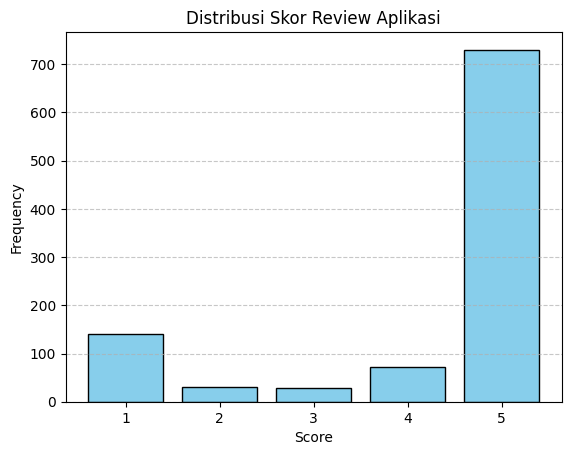

In [257]:
# Histogram skor 1–5
plt.hist(df2['score'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks([1, 2, 3, 4, 5])  # Skor tetap integer
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribusi Skor Review Aplikasi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [258]:
# Rangkuman statistik
df2.describe().loc[:, ['score']]

,score
count,1000.000000
mean,4.221000
std,1.446462
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: xlabel='at'>

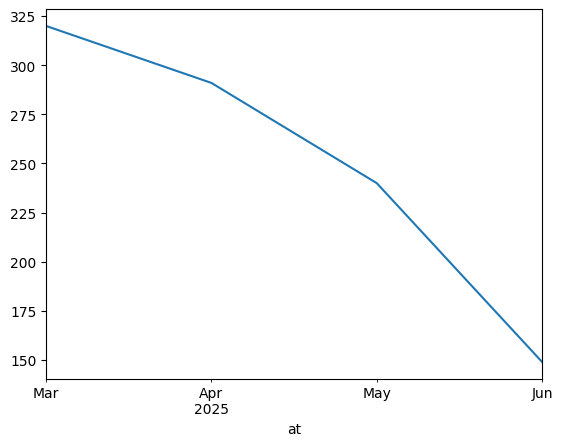

In [259]:
# Grafik jumlah review per bulan.
df['at'] = pd.to_datetime(df['at'])  # Pastikan format datetime
df.set_index('at').resample('ME').count()['reviewId'].plot()


### 3️⃣ **Tahapan Preprocessing**

In [260]:
# ✅ 1. Handling Missing Values → Menghapus atau mengisi data yang kosong  
print(df2.isnull().sum())

content    0
score      0
dtype: int64


In [261]:
# ✅ 2. Lowercasing → Mengubah seluruh teks menjadi huruf kecil  
df2['content_clean'] = df2['content'].astype(str).str.lower()
df2.head(5)

,content,score,content_clean
0,"Alright app. Just don't fall for buying the ""P...",1,"alright app. just don't fall for buying the ""p..."
1,good aap for learning programing languages,5,good aap for learning programing languages
2,"I've sent the transaction details, kindly chec...",4,"i've sent the transaction details, kindly chec..."
3,"Hello and Dear ""Simone"".... thank you for the ...",2,"hello and dear ""simone"".... thank you for the ..."
4,sir please explain this to me what is the diff...,1,sir please explain this to me what is the diff...


In [262]:
# ✅ 3. Expand Contraction → Mengubah bentuk singkatan menjadi bentuk lengkap (e.g., don't → do not)  
df2['content_clean'] = df2['content_clean'].apply(lambda x: contractions.fix(x))
df2.head(5)

,content,score,content_clean
0,"Alright app. Just don't fall for buying the ""P...",1,"alright app. just do not fall for buying the ""..."
1,good aap for learning programing languages,5,good aap for learning programing languages
2,"I've sent the transaction details, kindly chec...",4,"i have sent the transaction details, kindly ch..."
3,"Hello and Dear ""Simone"".... thank you for the ...",2,"hello and dear ""simone"".... thank you for the ..."
4,sir please explain this to me what is the diff...,1,sir please explain this to me what is the diff...


In [263]:
# ✅ 4. Tokenisasi → Memisahkan teks menjadi daftar kata

# Inisialisasi tokenizer Treebank
tokenizer = TreebankWordTokenizer()

# Terapkan tokenisasi
df2['tokens'] = df2['content_clean'].apply(lambda x: tokenizer.tokenize(x))
df2.head(5)


,content,score,content_clean,tokens
0,"Alright app. Just don't fall for buying the ""P...",1,"alright app. just do not fall for buying the ""...","[alright, app., just, do, not, fall, for, buyi..."
1,good aap for learning programing languages,5,good aap for learning programing languages,"[good, aap, for, learning, programing, languages]"
2,"I've sent the transaction details, kindly chec...",4,"i have sent the transaction details, kindly ch...","[i, have, sent, the, transaction, details, ,, ..."
3,"Hello and Dear ""Simone"".... thank you for the ...",2,"hello and dear ""simone"".... thank you for the ...","[hello, and, dear, ``, simone, '', ..., ., tha..."
4,sir please explain this to me what is the diff...,1,sir please explain this to me what is the diff...,"[sir, please, explain, this, to, me, what, is,..."


In [264]:
# ✅ 5. Cabang token untuk VADER 
df2['tokens_vader'] = df2['tokens']

In [265]:
# Stopwords bawaan + custom domain-specific
stop_words = set(stopwords.words('english'))

# Tambahkan custom stopwords domain Play Store
custom_words = {
    'app', 'apps', 'application', 'play', 'store', 'installed', 'install',
    'downloading', 'download', 'device', 'phone', 'mobile', 'using', 'used',
    'google', 'work', 'mimo', 'hub', 'sphero', 'edu','sololearn','codecademy','go','working'  # opsional tergantung fokus topik
}
stop_words.update(custom_words)

# Terapkan stopword removal ke token yang sudah bebas tanda baca
df2['tokens_clean'] = df2['tokens'].apply(lambda tokens: [t for t in tokens if t not in stop_words])


In [266]:
def normalize_token(token):
    # Hapus spasi, simbol, dan karakter unicode aneh
    token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8')
    return token.strip()  # Hapus spasi atau newline

def is_alpha(token):
    return token.isalpha()

df2['tokens_clean'] = df2['tokens_clean'].apply(lambda tokens: [
    normalize_token(t).lower()
    for t in tokens
    if is_alpha(normalize_token(t).strip())
])

df2.head(5)

,content,score,content_clean,tokens,tokens_vader,tokens_clean
0,"Alright app. Just don't fall for buying the ""P...",1,"alright app. just do not fall for buying the ""...","[alright, app., just, do, not, fall, for, buyi...","[alright, app., just, do, not, fall, for, buyi...","[alright, fall, buying, pro, especially, bough..."
1,good aap for learning programing languages,5,good aap for learning programing languages,"[good, aap, for, learning, programing, languages]","[good, aap, for, learning, programing, languages]","[good, aap, learning, programing, languages]"
2,"I've sent the transaction details, kindly chec...",4,"i have sent the transaction details, kindly ch...","[i, have, sent, the, transaction, details, ,, ...","[i, have, sent, the, transaction, details, ,, ...","[sent, transaction, details, kindly, check, mail]"
3,"Hello and Dear ""Simone"".... thank you for the ...",2,"hello and dear ""simone"".... thank you for the ...","[hello, and, dear, ``, simone, '', ..., ., tha...","[hello, and, dear, ``, simone, '', ..., ., tha...","[hello, dear, simone, thank, immediate, reply,..."
4,sir please explain this to me what is the diff...,1,sir please explain this to me what is the diff...,"[sir, please, explain, this, to, me, what, is,...","[sir, please, explain, this, to, me, what, is,...","[sir, please, explain, difference, beta, versi..."


In [267]:
# Cek baris mana saja yang mengandung token 'nice' sebelum dibersihkan
df2[df2['tokens'].apply(lambda tokens: 'nice' in tokens)]


,content,score,content_clean,tokens,tokens_vader,tokens_clean
37,"Good learning app, easy to understand and it's...",5,"good learning app, easy to understand and it i...","[good, learning, app, ,, easy, to, understand,...","[good, learning, app, ,, easy, to, understand,...","[good, learning, easy, understand, nice]"
38,It's a nice app..,5,it is a nice app..,"[it, is, a, nice, app..]","[it, is, a, nice, app..]",[nice]
42,it's a really nice app for learning coding,5,it is a really nice app for learning coding,"[it, is, a, really, nice, app, for, learning, ...","[it, is, a, really, nice, app, for, learning, ...","[really, nice, learning, coding]"
60,nice,5,nice,[nice],[nice],[nice]
61,nice,5,nice,[nice],[nice],[nice]
...,...,...,...,...,...,...
857,Very nice,5,very nice,"[very, nice]","[very, nice]",[nice]
906,Nice 👍,5,nice 👍,"[nice, 👍]","[nice, 👍]",[nice]
968,Nice app,4,nice app,"[nice, app]","[nice, app]",[nice]
970,Very nice,5,very nice,"[very, nice]","[very, nice]",[nice]


In [268]:
#✅ 8. Lemmatization
# Load model spaCy
nlp = spacy.load("en_core_web_sm")

# Fungsi lemmatizer menggunakan spaCy
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Gabungkan token ke dalam satu string untuk diproses
    return [token.lemma_ for token in doc]

# Lemmatisasi kolom 'tokens_vader'
df2['tokens_vader_lemma'] = df2['tokens_vader'].apply(lemmatize_tokens)

# Lemmatisasi kolom 'tokens_clean'
df2['tokens_clean_lemma'] = df2['tokens_clean'].apply(lemmatize_tokens)
df2.head(5)


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_vader_lemma,tokens_clean_lemma
0,"Alright app. Just don't fall for buying the ""P...",1,"alright app. just do not fall for buying the ""...","[alright, app., just, do, not, fall, for, buyi...","[alright, app., just, do, not, fall, for, buyi...","[alright, fall, buying, pro, especially, bough...","[alright, app, ., just, do, not, fall, for, bu...","[alright, fall, buying, pro, especially, buy, ..."
1,good aap for learning programing languages,5,good aap for learning programing languages,"[good, aap, for, learning, programing, languages]","[good, aap, for, learning, programing, languages]","[good, aap, learning, programing, languages]","[good, aap, for, learn, program, language]","[good, aap, learning, program, language]"
2,"I've sent the transaction details, kindly chec...",4,"i have sent the transaction details, kindly ch...","[i, have, sent, the, transaction, details, ,, ...","[i, have, sent, the, transaction, details, ,, ...","[sent, transaction, details, kindly, check, mail]","[I, have, send, the, transaction, detail, ,, k...","[send, transaction, detail, kindly, check, mail]"
3,"Hello and Dear ""Simone"".... thank you for the ...",2,"hello and dear ""simone"".... thank you for the ...","[hello, and, dear, ``, simone, '', ..., ., tha...","[hello, and, dear, ``, simone, '', ..., ., tha...","[hello, dear, simone, thank, immediate, reply,...","[hello, and, dear, `, `, simone, '', ..., ., t...","[hello, dear, simone, thank, immediate, reply,..."
4,sir please explain this to me what is the diff...,1,sir please explain this to me what is the diff...,"[sir, please, explain, this, to, me, what, is,...","[sir, please, explain, this, to, me, what, is,...","[sir, please, explain, difference, beta, versi...","[sir, please, explain, this, to, I, what, be, ...","[sir, please, explain, difference, beta, versi..."


In [269]:
#✅ 9. Removing Rare Words (frekuensi < 3)

# Gabungkan semua token dari seluruh review menjadi satu list
all_clean_lemmas = [token for tokens in df2['tokens_clean_lemma'] for token in tokens]

# Hitung frekuensi kata
token_freq = Counter(all_clean_lemmas)

# Ambil kata-kata yang muncul ≥ 3 kali
min_freq = 3
valid_tokens = set([token for token, freq in token_freq.items() if freq >= min_freq])

# Hapus token yang tidak termasuk dalam set valid_tokens
df2['tokens_clean_final'] = df2['tokens_clean_lemma'].apply(lambda tokens: [t for t in tokens if t in valid_tokens])
df2.head()


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_vader_lemma,tokens_clean_lemma,tokens_clean_final
0,"Alright app. Just don't fall for buying the ""P...",1,"alright app. just do not fall for buying the ""...","[alright, app., just, do, not, fall, for, buyi...","[alright, app., just, do, not, fall, for, buyi...","[alright, fall, buying, pro, especially, bough...","[alright, app, ., just, do, not, fall, for, bu...","[alright, fall, buying, pro, especially, buy, ...","[pro, especially, buy, lifetime, access, still..."
1,good aap for learning programing languages,5,good aap for learning programing languages,"[good, aap, for, learning, programing, languages]","[good, aap, for, learning, programing, languages]","[good, aap, learning, programing, languages]","[good, aap, for, learn, program, language]","[good, aap, learning, program, language]","[good, aap, learning, program, language]"
2,"I've sent the transaction details, kindly chec...",4,"i have sent the transaction details, kindly ch...","[i, have, sent, the, transaction, details, ,, ...","[i, have, sent, the, transaction, details, ,, ...","[sent, transaction, details, kindly, check, mail]","[I, have, send, the, transaction, detail, ,, k...","[send, transaction, detail, kindly, check, mail]","[send, transaction, detail, kindly, check, mail]"
3,"Hello and Dear ""Simone"".... thank you for the ...",2,"hello and dear ""simone"".... thank you for the ...","[hello, and, dear, ``, simone, '', ..., ., tha...","[hello, and, dear, ``, simone, '', ..., ., tha...","[hello, dear, simone, thank, immediate, reply,...","[hello, and, dear, `, `, simone, '', ..., ., t...","[hello, dear, simone, thank, immediate, reply,...","[hello, thank, reply, section, however, put, s..."
4,sir please explain this to me what is the diff...,1,sir please explain this to me what is the diff...,"[sir, please, explain, this, to, me, what, is,...","[sir, please, explain, this, to, me, what, is,...","[sir, please, explain, difference, beta, versi...","[sir, please, explain, this, to, I, what, be, ...","[sir, please, explain, difference, beta, versi...","[please, explain, version, one, pro, user, new..."


In [270]:
# ✅ 10. Handling Missing Values → Menghapus data yang kosong 

print("Jumlah baris SEBELUM pembersihan:", len(df2))

# Hapus baris jika kolom 'tokens' kosong (NaN atau [])
df2 = df2[~df2['tokens_clean_final'].isnull()]                            # Hapus jika NaN
df2 = df2[df2['tokens_clean_final'].apply(lambda x: len(x) > 0)]          # Hapus jika list kosong []

# Reset index agar rapi (opsional)
df2 = df2.reset_index(drop=True)

# Tampilkan jumlah baris setelah pembersihan
print("Jumlah baris SESUDAH pembersihan:", len(df2))

Jumlah baris SEBELUM pembersihan: 1000
Jumlah baris SESUDAH pembersihan: 959


### 4️⃣ **Cek Sentiment Analysis - Textblob**

In [271]:
# Hitung sentimen dengan aman menggunakan .loc
df2.loc[:, 'sentiment_polarity'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.polarity)
df2.loc[:, 'sentiment_subjective'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.subjectivity)

In [272]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df2['sentiment_rating'] = df2['score'].apply(lambda x: 'positive' if x > 3 else('neutral' if x == 3  else 'negative'))

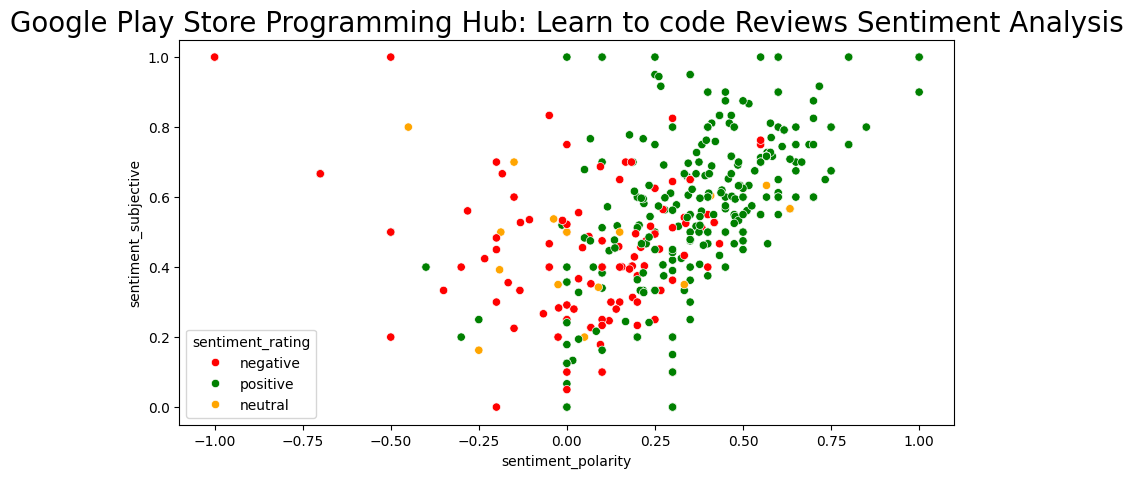

In [273]:
# Mapping warna manual untuk hue
custom_palette = {
    'positive': 'green',
    'neutral': 'orange',
    'negative': 'red'
}

plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='sentiment_polarity',
    y='sentiment_subjective',
    hue='sentiment_rating',
    data=df2,
    edgecolor='white',
    palette=custom_palette
)
plt.title("Google Play Store Programming Hub: Learn to code Reviews Sentiment Analysis", fontsize=20)
plt.show()


In [274]:
# Hitung jumlah masing-masing kategori
rating_counts = df2['sentiment_rating'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan jumlah frekuensinya
print("📊 Jumlah Review per Kategori Berdasarkan Score:")
for sentiment, count in rating_counts.items():
    print(f"- {sentiment:<8}: {count} review")

📊 Jumlah Review per Kategori Berdasarkan Score:
- positive: 763 review
- neutral : 28 review
- negative: 168 review


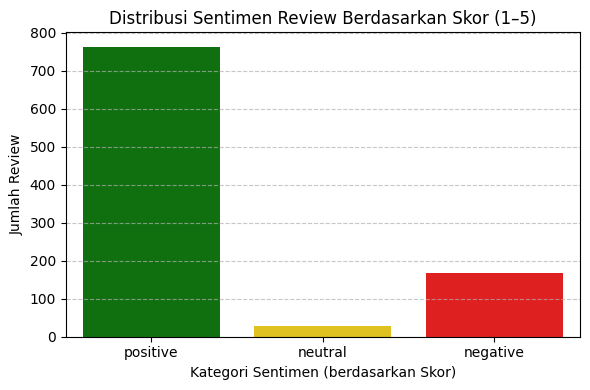

In [275]:
# Siapkan DataFrame untuk visualisasi
rating_df = rating_counts.reset_index()
rating_df.columns = ['sentiment', 'count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=rating_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen (berdasarkan Skor)")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review Berdasarkan Skor (1–5)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

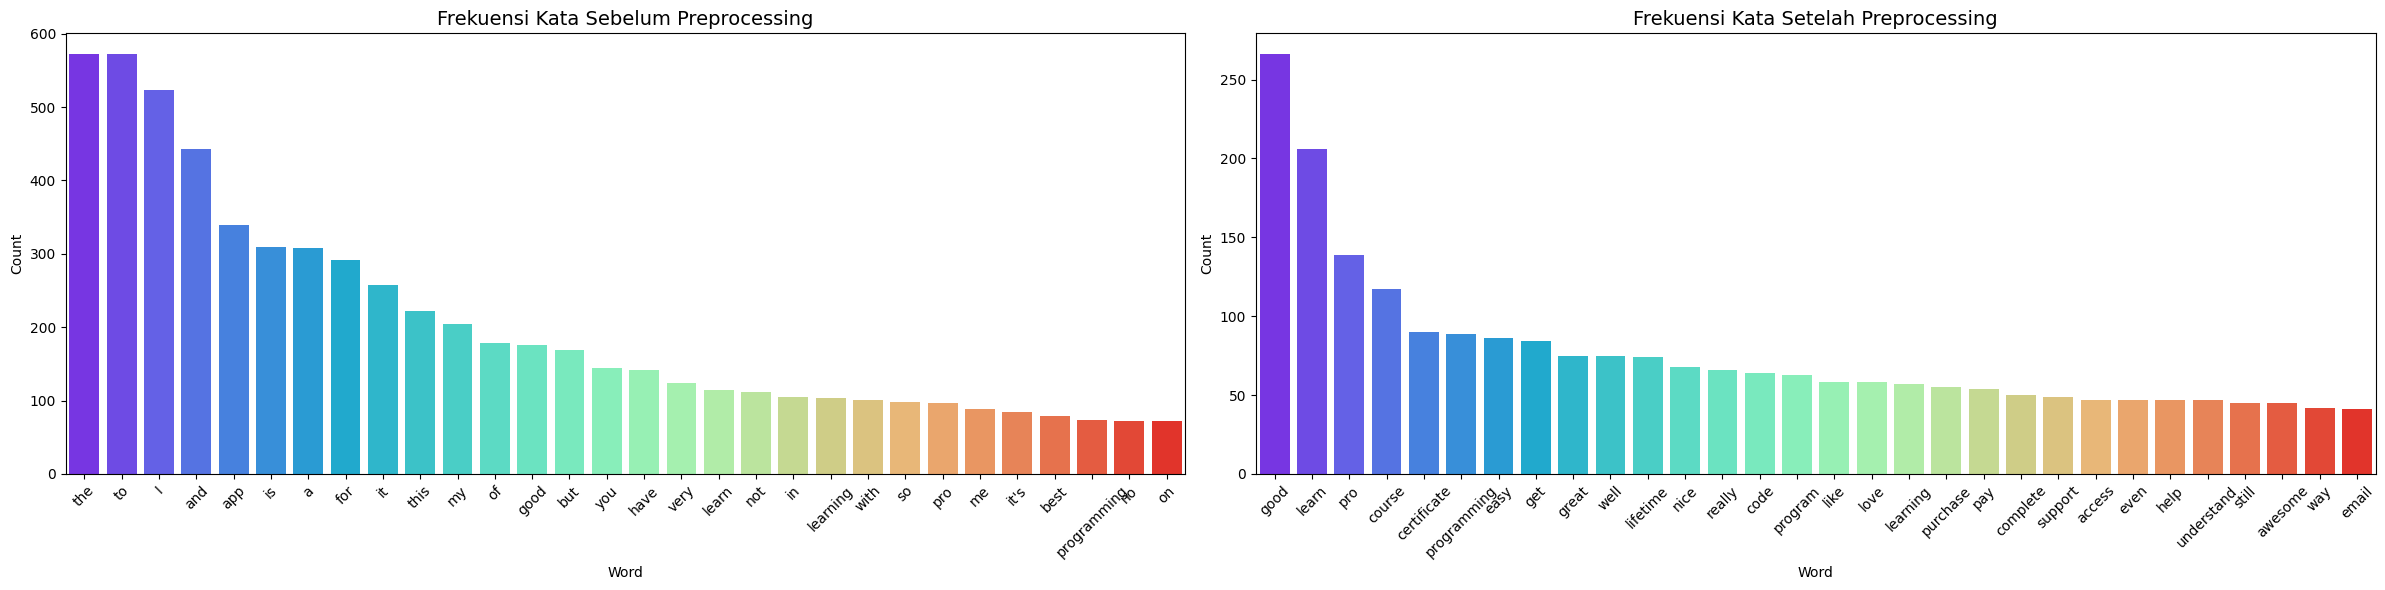

In [276]:
# Fungsi untuk visualisasi frekuensi kata
def freq_words(ax, text_series, terms=30, title="Frekuensi Kata"):
    all_words = ' '.join([text for text in text_series])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})
    top_words = words_df.nlargest(columns="count", n=terms)
    
    sns.barplot(data=top_words, x="word", y="count", hue="word", palette="rainbow", legend=False, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("Count")
    ax.set_xlabel("Word")
    ax.tick_params(axis='x', rotation=45)

# Pastikan tidak ada nilai NaN
df2['content'] = df2['content'].fillna('').astype(str)

# Gabungkan token menjadi string untuk versi "after"
df2['clean_text_final'] = df2['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens))

# Buat 2 subplots untuk before & after
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Ganti judul tanpa emoji
freq_words(axes[0], df2['content'], title="Frekuensi Kata Sebelum Preprocessing")
freq_words(axes[1], df2['clean_text_final'], title="Frekuensi Kata Setelah Preprocessing")

plt.tight_layout()
plt.show()

### 5️⃣ **Cek Sentiment Analysis - Vader**

In [277]:
# Unduh lexicon VADER jika belum
# nltk.download('vader_lexicon')

# Inisialisasi analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [278]:
df_vader = df2[['tokens_vader_lemma']].copy()
# Gabungkan token menjadi kalimat
df_vader['text'] = df_vader['tokens_vader_lemma'].apply(lambda tokens: ' '.join(tokens))

df_vader.head(5)

,tokens_vader_lemma,text
0,"[alright, app, ., just, do, not, fall, for, bu...",alright app . just do not fall for buy the ` `...
1,"[good, aap, for, learn, program, language]",good aap for learn program language
2,"[I, have, send, the, transaction, detail, ,, k...","I have send the transaction detail , kindly ch..."
3,"[hello, and, dear, `, `, simone, '', ..., ., t...",hello and dear ` ` simone '' ... . thank you f...
4,"[sir, please, explain, this, to, I, what, be, ...",sir please explain this to I what be the diffe...


In [279]:
# Fungsi untuk mengembalikan skor dari VADER
def get_vader_scores(text):
    return vader_analyzer.polarity_scores(text)

# Hitung skor dan ubah jadi kolom DataFrame
vader_scores = df_vader['text'].apply(get_vader_scores).apply(pd.Series)
df_vader = pd.concat([df_vader, vader_scores], axis=1)

In [280]:
# Kategorikan Sentimen
def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_vader['vader_sentiment'] = df_vader['compound'].apply(categorize_sentiment)

In [281]:
df_vader.head(5)

,tokens_vader_lemma,text,neg,neu,pos,compound,vader_sentiment
0,"[alright, app, ., just, do, not, fall, for, bu...",alright app . just do not fall for buy the ` `...,0.160,0.721,0.119,-0.3818,negative
1,"[good, aap, for, learn, program, language]",good aap for learn program language,0.000,0.633,0.367,0.4404,positive
2,"[I, have, send, the, transaction, detail, ,, k...","I have send the transaction detail , kindly ch...",0.000,0.714,0.286,0.4939,positive
3,"[hello, and, dear, `, `, simone, '', ..., ., t...",hello and dear ` ` simone '' ... . thank you f...,0.028,0.761,0.211,0.9558,positive
4,"[sir, please, explain, this, to, I, what, be, ...",sir please explain this to I what be the diffe...,0.000,0.860,0.140,0.7992,positive


In [282]:
# Hitung jumlah masing-masing kategori sentimen
sentiment_counts = df_vader['vader_sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan frekuensi
print("📊 Jumlah Review per Kategori Sentimen (VADER):")
for sentiment, count in sentiment_counts.items():
    print(f"- {sentiment.capitalize():<8}: {count} review")

📊 Jumlah Review per Kategori Sentimen (VADER):
- Positive: 801 review
- Neutral : 64 review
- Negative: 94 review


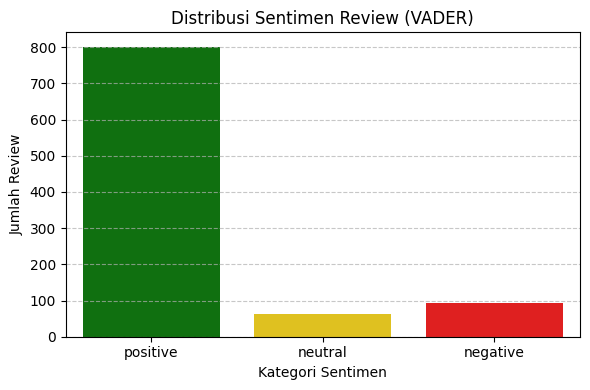

In [283]:
# Siapkan DataFrame untuk visualisasi
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['sentiment', 'count']

# Buat barplot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review (VADER)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [284]:
# Gabungkan kolom ke dalam satu DataFrame
df_compare = df2[['score', 'sentiment_rating']].copy()
df_compare['vader_sentiment'] = df_vader['vader_sentiment']

In [285]:
# Hitung jumlah masing-masing kombinasi kategori
compare_counts = df_compare.groupby(['sentiment_rating', 'vader_sentiment']).size().unstack(fill_value=0)
print("📊 Tabel Perbandingan Sentimen (Score vs VADER):\n")
print(compare_counts)

📊 Tabel Perbandingan Sentimen (Score vs VADER):

vader_sentiment   negative  neutral  positive
sentiment_rating                             
negative                67       23        78
neutral                 10        7        11
positive                17       34       712


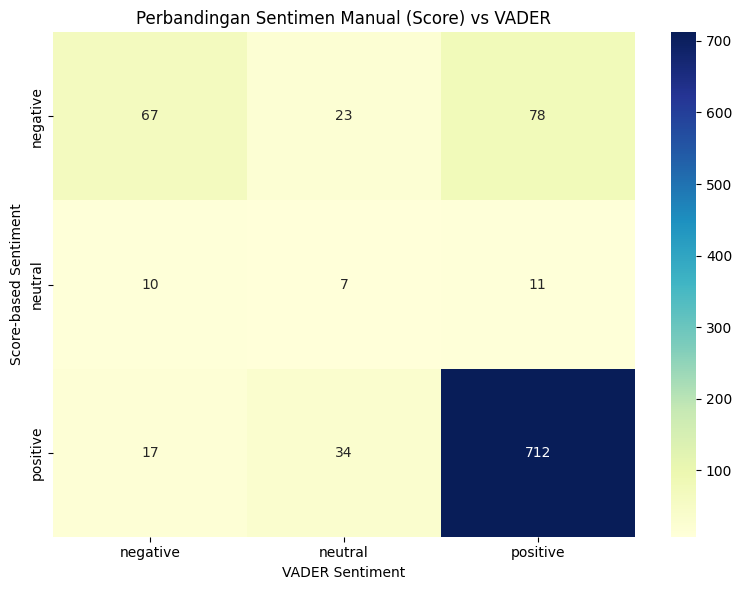

In [286]:
plt.figure(figsize=(8, 6))
sns.heatmap(compare_counts, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Perbandingan Sentimen Manual (Score) vs VADER")
plt.xlabel("VADER Sentiment")
plt.ylabel("Score-based Sentiment")
plt.tight_layout()
plt.show()

In [287]:
# Buat kolom baru untuk mengecek apakah label cocok
df_compare['sentiment_match'] = df_compare['sentiment_rating'].str.lower() == df_compare['vader_sentiment']

total_reviews = len(df_compare)
matched = df_compare['sentiment_match'].sum()
accuracy = matched / total_reviews
print(f"✅ Total review         : {total_reviews}")
print(f"✅ Jumlah yang cocok    : {matched}")
print(f"📊 Akurasi Kesesuaian   : {accuracy:.2%}")


✅ Total review         : 959
✅ Jumlah yang cocok    : 786
📊 Akurasi Kesesuaian   : 81.96%


### 6️⃣ **Topic Modelling**

In [288]:
# Buat dataset baru untuk data model
df_modelling = df2[['tokens_clean_final']].copy()
df_modelling['clean_text_final'] = df_modelling['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens)) 

In [289]:
df_modelling.head(5)

,tokens_clean_final,clean_text_final
0,"[pro, especially, buy, lifetime, access, still...",pro especially buy lifetime access still give ...
1,"[good, aap, learning, program, language]",good aap learning program language
2,"[send, transaction, detail, kindly, check, mail]",send transaction detail kindly check mail
3,"[hello, thank, reply, section, however, put, s...",hello thank reply section however put several ...
4,"[please, explain, version, one, pro, user, new...",please explain version one pro user new versio...


In [290]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,       # Hapus kata yang terlalu umum (muncul di >95% dokumen)
    min_df=2,          # Hapus kata yang sangat langka (muncul <2 dokumen)
    ngram_range=(1, 2)  # Termasuk bigram: meningkatkan konteks topik
)

# Transformasi ke TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(df_modelling['clean_text_final'])

In [291]:
# Tentukan jumlah topik
n_topics = 5  

# Inisialisasi dan training NMF
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(X_tfidf)


,n_components,5
,init,None
,solver,'cd'
,beta_loss,'frobenius'
,tol,0.0001
,max_iter,200
,random_state,42
,alpha_W,0.0
,alpha_H,'same'
,l1_ratio,0.0
,verbose,0


In [292]:
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"\n🧠 Topik {topic_idx+1}:")
        print(", ".join(top_features))

# Panggil fungsi
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(nmf_model, tfidf_feature_names)


🧠 Topik 1:
good, good learning, learning, good learn, good beginner, good programming, beginner, good good, really good, programming

🧠 Topik 2:
nice, nice learn, beginner, video, experience, useful, bad, teaching, aap, programming

🧠 Topik 3:
great, far, great learn, love, great learning, great easy, experience, learning, service, coding

🧠 Topik 4:
learn, well, easy, easy learn, programming, love, understand, code, well learn, program

🧠 Topik 5:
awesome, awesome learn, beginner, content, friendly, wait, code, really awesome, enjoy, learning code


In [293]:
# Mapping topik ke label tematik (edit sesuai kebutuhan dan interpretasi manual)
topic_labels = {
    0: "Topik 1 - Pengalaman Belajar Positif untuk Pemula",
    1: "Topik 2 - Kualitas Materi & Pengalaman Pembelajaran",
    2: "Topik 3 - Kecintaan & Kepuasan terhadap Aplikasi",
    3: "Topik 4 - Kemudahan dan Pemahaman dalam Belajar",
    4: "Topik 5 - Antusiasme Belajar Coding untuk Pemula"
}
def display_labeled_topics(model, feature_names, topic_labels, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        label = topic_labels.get(topic_idx, f"Topik {topic_idx+1}")  # fallback jika label tidak tersedia
        print(f"\n🧠 {label}")
        print("🔑 Kata Kunci:", ", ".join(top_features))

# Panggil fungsi
display_labeled_topics(nmf_model, tfidf_feature_names, topic_labels)


🧠 Topik 1 - Pengalaman Belajar Positif untuk Pemula
🔑 Kata Kunci: good, good learning, learning, good learn, good beginner, good programming, beginner, good good, really good, programming

🧠 Topik 2 - Kualitas Materi & Pengalaman Pembelajaran
🔑 Kata Kunci: nice, nice learn, beginner, video, experience, useful, bad, teaching, aap, programming

🧠 Topik 3 - Kecintaan & Kepuasan terhadap Aplikasi
🔑 Kata Kunci: great, far, great learn, love, great learning, great easy, experience, learning, service, coding

🧠 Topik 4 - Kemudahan dan Pemahaman dalam Belajar
🔑 Kata Kunci: learn, well, easy, easy learn, programming, love, understand, code, well learn, program

🧠 Topik 5 - Antusiasme Belajar Coding untuk Pemula
🔑 Kata Kunci: awesome, awesome learn, beginner, content, friendly, wait, code, really awesome, enjoy, learning code


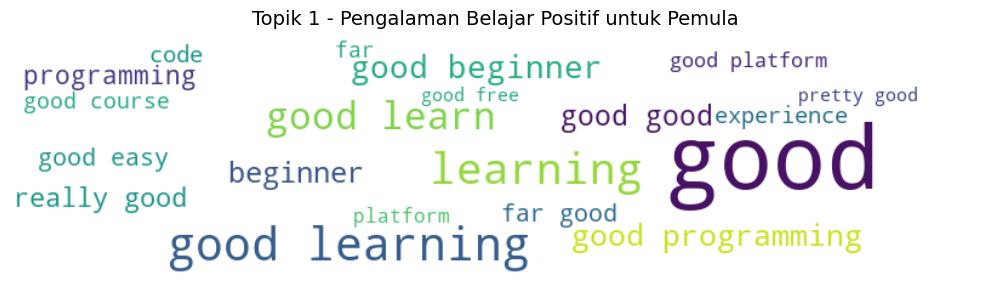

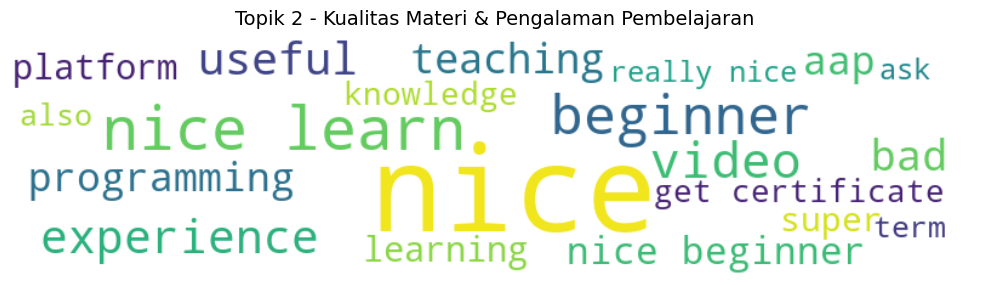

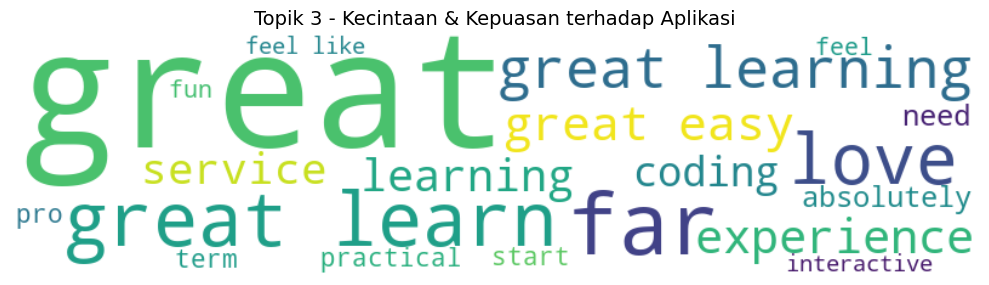

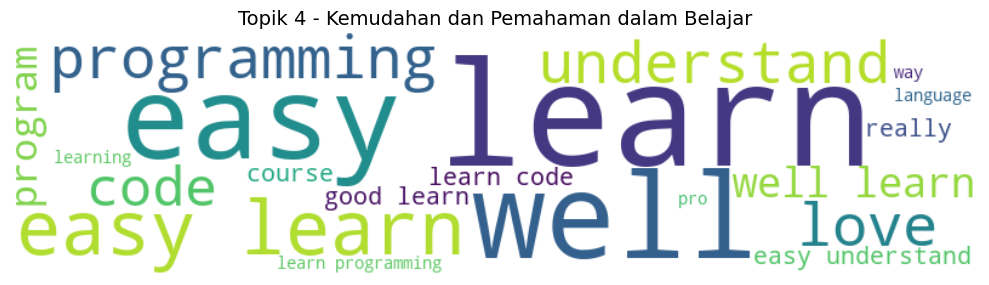

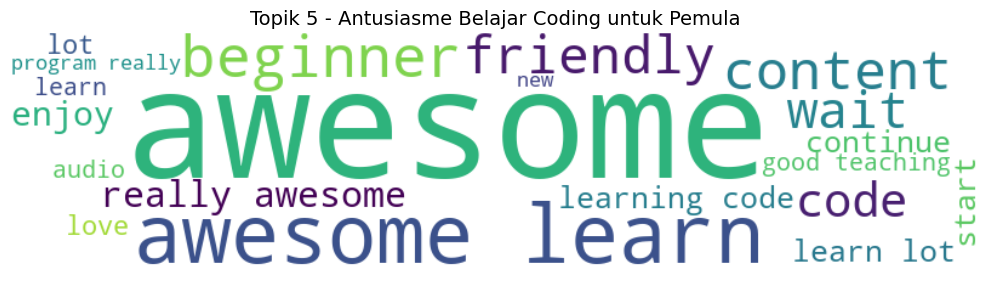

In [294]:
def plot_wordclouds_with_labels(model, feature_names, topic_labels, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        top_features = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=200, background_color='white').generate_from_frequencies(top_features)

        label = topic_labels.get(topic_idx, f"Topik {topic_idx + 1}")
        
        plt.figure(figsize=(10, 3))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{label}", fontsize=14)
        plt.tight_layout()
        plt.show()


# Jalankan visualisasi WordCloud
plot_wordclouds_with_labels(nmf_model, tfidf_feature_names, topic_labels)

In [295]:
# Dapatkan distribusi topik tiap dokumen
topic_distribution = nmf_model.transform(X_tfidf)

# Ambil topik dominan untuk setiap review
df_modelling['dominant_topic'] = topic_distribution.argmax(axis=1)

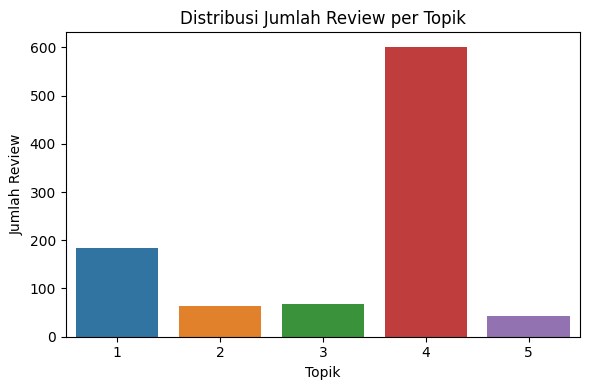

In [296]:
# Buat salinan kolom untuk ditampilkan sebagai 1-based indexing
df_modelling['dominant_topic_display'] = df_modelling['dominant_topic'] + 1

# Visualisasi distribusi topik dengan label mulai dari 1
plt.figure(figsize=(6, 4))
sns.countplot(
    x='dominant_topic_display',
    data=df_modelling,
    hue='dominant_topic_display',
    palette='tab10',
    legend=False
)
plt.title("Distribusi Jumlah Review per Topik")
plt.xlabel("Topik")
plt.ylabel("Jumlah Review")
plt.tight_layout()
plt.show()


In [297]:
df_modelling['jenis_topik'] = df_modelling['dominant_topic'].map(topic_labels) 
df_modelling.head(5)

,tokens_clean_final,clean_text_final,dominant_topic,dominant_topic_display,jenis_topik
0,"[pro, especially, buy, lifetime, access, still...",pro especially buy lifetime access still give ...,3,4,Topik 4 - Kemudahan dan Pemahaman dalam Belajar
1,"[good, aap, learning, program, language]",good aap learning program language,0,1,Topik 1 - Pengalaman Belajar Positif untuk Pemula
2,"[send, transaction, detail, kindly, check, mail]",send transaction detail kindly check mail,3,4,Topik 4 - Kemudahan dan Pemahaman dalam Belajar
3,"[hello, thank, reply, section, however, put, s...",hello thank reply section however put several ...,3,4,Topik 4 - Kemudahan dan Pemahaman dalam Belajar
4,"[please, explain, version, one, pro, user, new...",please explain version one pro user new versio...,3,4,Topik 4 - Kemudahan dan Pemahaman dalam Belajar


### 7️⃣ **Clustering**

In [298]:
# Buat dataset baru untuk data model
df_clustering = df2[['tokens_clean_final']].copy()
df_clustering['clean_text_final'] = df_clustering['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens)) 

In [299]:
df_clustering.head(5)

,tokens_clean_final,clean_text_final
0,"[pro, especially, buy, lifetime, access, still...",pro especially buy lifetime access still give ...
1,"[good, aap, learning, program, language]",good aap learning program language
2,"[send, transaction, detail, kindly, check, mail]",send transaction detail kindly check mail
3,"[hello, thank, reply, section, however, put, s...",hello thank reply section however put several ...
4,"[please, explain, version, one, pro, user, new...",please explain version one pro user new versio...


In [300]:
# Vectorizer untuk clustering (gunakan unigram dulu agar stabil)
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english',
    ngram_range=(1, 1)
)

X_tfidf = tfidf_vectorizer.fit_transform(df_clustering['clean_text_final'])

In [301]:
# Tentukan jumlah cluster (misalnya 5, bisa diuji nanti)
n_clusters = 5
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(X_tfidf)

# Simpan label cluster ke DataFrame
df_clustering['cluster'] = kmeans_model.labels_

In [302]:
# Ambil nama fitur dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
def show_top_keywords_per_cluster(kmeans_model, feature_names, n_terms=10):
    for cluster_num, cluster_center in enumerate(kmeans_model.cluster_centers_):
        # Ambil index fitur tertinggi
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        top_keywords = [feature_names[i] for i in top_indices]
        
        print(f"\n🔷 Cluster {cluster_num}:")
        print("   " + ", ".join(top_keywords))

# Panggil fungsi
show_top_keywords_per_cluster(kmeans_model, feature_names)


🔷 Cluster 0:
   pro, certificate, love, course, lifetime, pay, access, complete, purchase, subscription

🔷 Cluster 1:
   far, good, amazing, learn, easy, love, great, pretty, code, lot

🔷 Cluster 2:
   great, learn, easy, learning, interactive, understand, start, really, notification, absolutely

🔷 Cluster 3:
   good, learning, learn, beginner, programming, course, subscription, say, thank, code

🔷 Cluster 4:
   learn, nice, good, easy, awesome, programming, code, program, understand, learning


In [303]:
# Mapping label deskriptif untuk tiap cluster
cluster_labels = {
    0: "Cluster 1 - Pengalaman Pengguna terhadap Layanan & Keanggotaan",
    1: "Cluster 2 - Antusiasme & Kepuasan terhadap Pembelajaran",
    2: "Cluster 3 - Harapan Pemula & Kebutuhan Fitur Belajar",
    3: "Cluster 4 - Pengalaman Belajar Coding untuk Pemula",
    4: "Cluster 5 - Pengajaran Profesional & Pemahaman Mendalam"
}


def show_labeled_keywords_per_cluster(kmeans_model, feature_names, cluster_labels, n_terms=10):
    for cluster_num, cluster_center in enumerate(kmeans_model.cluster_centers_):
        # Ambil top-n kata per cluster
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        top_keywords = [feature_names[i] for i in top_indices]
        
        # Ambil label deskriptif dari mapping
        label = cluster_labels.get(cluster_num, f"Cluster {cluster_num}")
        
        print(f"\n🔷 {label}:")
        print("   " + ", ".join(top_keywords))

show_labeled_keywords_per_cluster(kmeans_model, feature_names, cluster_labels)


🔷 Cluster 1 - Pengalaman Pengguna terhadap Layanan & Keanggotaan:
   pro, certificate, love, course, lifetime, pay, access, complete, purchase, subscription

🔷 Cluster 2 - Antusiasme & Kepuasan terhadap Pembelajaran:
   far, good, amazing, learn, easy, love, great, pretty, code, lot

🔷 Cluster 3 - Harapan Pemula & Kebutuhan Fitur Belajar:
   great, learn, easy, learning, interactive, understand, start, really, notification, absolutely

🔷 Cluster 4 - Pengalaman Belajar Coding untuk Pemula:
   good, learning, learn, beginner, programming, course, subscription, say, thank, code

🔷 Cluster 5 - Pengajaran Profesional & Pemahaman Mendalam:
   learn, nice, good, easy, awesome, programming, code, program, understand, learning


In [304]:
# Reduksi dimensi
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_results = tsne_model.fit_transform(X_tfidf.toarray())

# Simpan hasil TSNE ke DataFrame
df_clustering['tsne_x'] = tsne_results[:, 0]
df_clustering['tsne_y'] = tsne_results[:, 1]

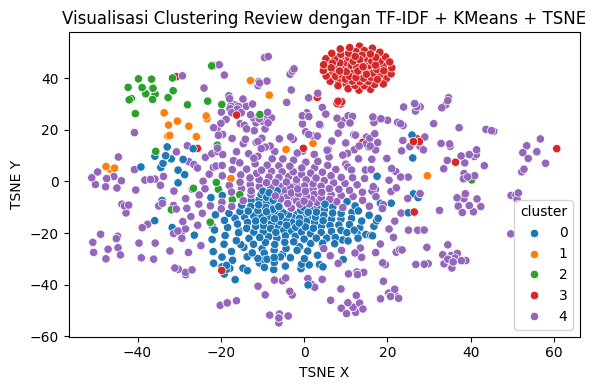

In [305]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='tsne_x', y='tsne_y',
    hue='cluster',
    data=df_clustering,
    palette='tab10',
    legend='full'
)

plt.title("Visualisasi Clustering Review dengan TF-IDF + KMeans + TSNE")
plt.xlabel("TSNE X")
plt.ylabel("TSNE Y")
plt.tight_layout()
plt.show()

In [306]:
# Buat kolom baru berdasarkan mapping
df_clustering['cluster_label'] = df_clustering['cluster'].map(cluster_labels)
df_clustering.head(5)

,tokens_clean_final,clean_text_final,cluster,tsne_x,tsne_y,cluster_label
0,"[pro, especially, buy, lifetime, access, still...",pro especially buy lifetime access still give ...,0,-10.106862,-26.039209,Cluster 1 - Pengalaman Pengguna terhadap Layan...
1,"[good, aap, learning, program, language]",good aap learning program language,4,32.878250,14.727719,Cluster 5 - Pengajaran Profesional & Pemahaman...
2,"[send, transaction, detail, kindly, check, mail]",send transaction detail kindly check mail,0,-12.076774,-19.603065,Cluster 1 - Pengalaman Pengguna terhadap Layan...
3,"[hello, thank, reply, section, however, put, s...",hello thank reply section however put several ...,0,-2.140281,-12.550344,Cluster 1 - Pengalaman Pengguna terhadap Layan...
4,"[please, explain, version, one, pro, user, new...",please explain version one pro user new versio...,0,-5.191463,-28.183390,Cluster 1 - Pengalaman Pengguna terhadap Layan...


### 8️⃣ **Penggabungan Data Hasil Review**

In [307]:
# Pastikan indexnya sejajar dan urutan review konsisten
df_final = pd.concat([
    df2[['content', 'score', 'sentiment_rating']].reset_index(drop=True),
    df_vader[['vader_sentiment']].reset_index(drop=True),
    df_modelling[['jenis_topik']].reset_index(drop=True),
    df_clustering[['cluster_label']].reset_index(drop=True)
], axis=1)

In [308]:
df_final.head(5)

,content,score,sentiment_rating,vader_sentiment,jenis_topik,cluster_label
0,"Alright app. Just don't fall for buying the ""P...",1,negative,negative,Topik 4 - Kemudahan dan Pemahaman dalam Belajar,Cluster 1 - Pengalaman Pengguna terhadap Layan...
1,good aap for learning programing languages,5,positive,positive,Topik 1 - Pengalaman Belajar Positif untuk Pemula,Cluster 5 - Pengajaran Profesional & Pemahaman...
2,"I've sent the transaction details, kindly chec...",4,positive,positive,Topik 4 - Kemudahan dan Pemahaman dalam Belajar,Cluster 1 - Pengalaman Pengguna terhadap Layan...
3,"Hello and Dear ""Simone"".... thank you for the ...",2,negative,positive,Topik 4 - Kemudahan dan Pemahaman dalam Belajar,Cluster 1 - Pengalaman Pengguna terhadap Layan...
4,sir please explain this to me what is the diff...,1,negative,positive,Topik 4 - Kemudahan dan Pemahaman dalam Belajar,Cluster 1 - Pengalaman Pengguna terhadap Layan...


In [309]:
output_path = "../data/review_final_programming_hub.xlsx"
df_final.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_final_programming_hub.xlsx
